In [4]:
!cd /content/
!git clone https://github.com/huggingface/diffusers.git
!pip install ./diffusers
!pip install -U -r ./diffusers/examples/text_to_image/requirements.txt

/bin/bash: line 1: cd: /content/: No such file or directory
fatal: destination path 'diffusers' already exists and is not an empty directory.
Processing ./diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.25.0.dev0-py3-none-any.whl size=1816330 sha256=595f3be31be881a951b5c8e4e0fedf0f5f6341aa490fb35f722503871f2b73ee
  Stored in directory: /tmp/pip-ephem-wheel-cache-wv0osxje/wheels/6f/af/c3/5db19e7a112cea41d29f3329b55a316853cc8bacdf29682161
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.25.0.dev0
    Uninstalling diffusers-0.25.0.dev0:
      Successfully uninstalled diffusers-0.25.0.dev0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 46.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 77.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [6]:
# pip install accelerate

In [5]:
!accelerate config default --mixed_precision fp16

Configuration already exists at /root/.cache/huggingface/accelerate/default_config.yaml, will not override. Run `accelerate config` manually or pass a different `save_location`.


In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [74]:
import os

os.environ['MODEL_NAME'] = f'CompVis/stable-diffusion-v1-2'
os.environ['DATASET_NAME'] = f'Ali-fb/ios_icons'
os.environ['OUTPUT_DIR'] = f'sd_aiconos-model-v1-2_400'

In [71]:
# pip install datasets transformers huggingface_hub


In [77]:
!accelerate launch diffusers/examples/text_to_image/train_text_to_image.py \
  --pretrained_model_name_or_path=$MODEL_NAME \
  --dataset_name=$DATASET_NAME \
  --use_ema \
  --resolution=32 --center_crop --random_flip \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --gradient_checkpointing \
  --mixed_precision="fp16" \
  --max_train_steps=400 \
  --learning_rate=1e-05 \
  --max_grad_norm=1 \
  --push_to_hub \
  --checkpointing_steps=100000 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --output_dir=$OUTPUT_DIR 

Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
12/11/2023 16:22:50 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: fp16

{'clip_sample_range', 'sample_max_value', 'variance_type', 'prediction_type', 'thresholding', 'dynamic_thresholding_ratio', 'clip_sample', 'timestep_spacing'} was not found in config. Values will be initialized to default values.
{'norm_num_groups', 'scaling_factor', 'force_upcast'} was not found in config. Values will be initialized to default values.
{'addition_embed_type_num_heads', 'class_embeddings_concat', 'mid_block_type', 'reverse_transformer_layers_per_block', 'dropout', 'time_embedding_type', 'upcast_attention', 'class_embed_type', 'resnet_time_scale_shift', 'num_attention_heads', 'conv_in_kernel', 'time_cond_proj_dim', 'only

Steps:   0%|                  | 0/400 [00:01<?, ?it/s, lr=1e-5, step_loss=0.676]Traceback (most recent call last):
  File "/workspace/Machine_Learning_Institute/week8_fine_tune_stable_diffusion/diffusers/examples/text_to_image/train_text_to_image.py", line 1074, in <module>
    main()
  File "/workspace/Machine_Learning_Institute/week8_fine_tune_stable_diffusion/diffusers/examples/text_to_image/train_text_to_image.py", line 958, in main
    optimizer.step()
  File "/usr/local/lib/python3.10/dist-packages/accelerate/optimizer.py", line 132, in step
    self.scaler.step(self.optimizer, closure)
  File "/usr/local/lib/python3.10/dist-packages/torch/cuda/amp/grad_scaler.py", line 416, in step
    retval = self._maybe_opt_step(optimizer, optimizer_state, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/cuda/amp/grad_scaler.py", line 315, in _maybe_opt_step
    retval = optimizer.step(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/accelerate/optimizer.

In [58]:
# Stable Diffusion V1
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image

from diffusers import DiffusionPipeline

pipe = DiffusionPipeline.from_pretrained("akadhim-ai/sd_aiconos-model-v1-2_400")


unet/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

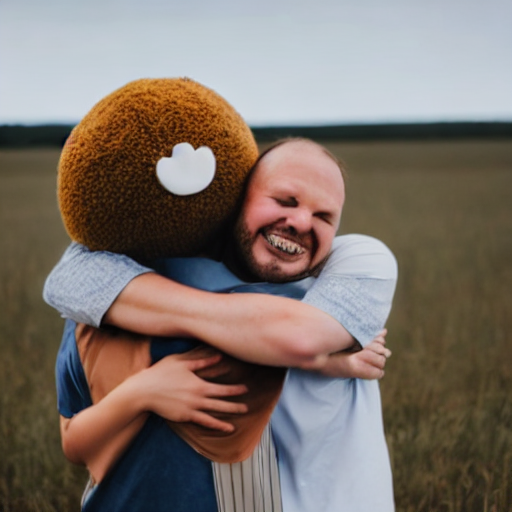

In [69]:
pipe.to("cuda")

# Run inference using ChatGPT prompts to acquire 4 image panels
image1 = pipe(prompt="a human with a hugging head").images[0]
image1.save("aiconOS_panel_1.png")

# Image grid helper function from HuggingFace
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

all_images = [image1]
grid = image_grid(all_images, rows=1, cols=1)
grid

In [38]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
    use_safetensors=True,
)
pipe = pipe.to("cuda")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

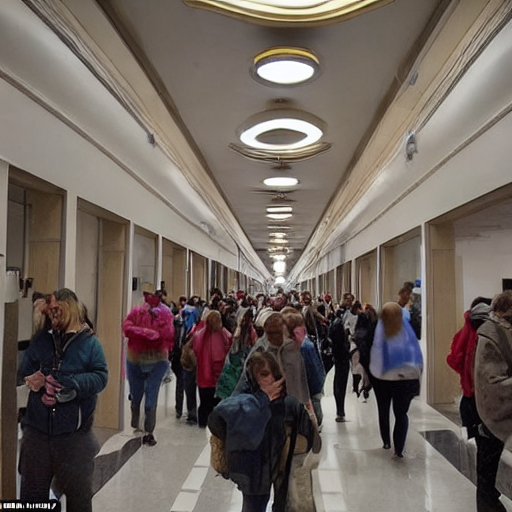

In [41]:

prompt = "a photo of crowds going towards a narrowing in the corridor"
pipe.enable_attention_slicing()
image = pipe(prompt).images[0]
image = [image]
grid = image_grid(image, rows=1, cols=1)
grid